### Import libraries

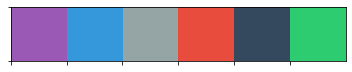

In [1]:
# Toolbox
import pandas as pd
import numpy as np
import random
import sys
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics
from scipy.stats import norm

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Misc
import os
import warnings
warnings.filterwarnings(action='ignore')

# Preset data display
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows =1000
pd.set_option('display.max_columns', 50)

# Set notebook colors and palette
flatui = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
sns.set_style('white')
sns.set_color_codes(palette='deep')
# Favorite code to use: #34995e

### TensorFlow

In [2]:
import tensorflow as tf

In [3]:
print(f"TensorFlow Version: {tf.__version__}")
print(f"TensorFlow Keras Version: {tf.keras.__version__}")
print("TensorFlow-GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
print(f"TensorFlow CUDA: {tf.test.is_built_with_cuda()}")
print(f"Tensorflow GPU Device Currently Activated: {tf.test.gpu_device_name()}")
print(f"TF Session: {tf.Session()}")
print()
print(f"Python {sys.version}")

TensorFlow Version: 1.13.1
TensorFlow Keras Version: 2.2.4-tf
TensorFlow-GPU is available
TensorFlow CUDA: True
Tensorflow GPU Device Currently Activated: /device:GPU:0
TF Session: <tensorflow.python.client.session.Session object at 0x000001C82F786A58>

Python 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


### Define functions

In [4]:
def pct_bar_labels():
    '''
    Function used to label the relative frequency on top of each bars
    '''
    # Set font size
    fs=15
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency (%)', fontsize=fs)
    plt.xticks(rotation=0, fontsize=fs)
    plt.yticks([])
    
    # Set individual bar labels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=fs, color='black')

def freq_table(var):
    '''
    Define plot global variables
    Create a function that will populate a frequency table (%)
    Get counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get Values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100, 2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=(12,8))
    ax1.title.set_size(15)
    pct_bar_labels()
    plt.show()
    
# Define a null function
def get_nulls(df):
    
    # Get null pct and counts
    null_cols = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df),2), columns=['Null Data Pct'])

    # Combine dataframes horizontally
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

    # Print
    print('There are', len(all_nulls), 'columns with missing values.')
    return all_nulls

### Load data

In [5]:
# Set directory
PATH = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\LargeData'
os.chdir(PATH)
os.getcwd()
os.listdir()

['19-credit-card-defaults.csv']

In [6]:
data = pd.read_csv('19-credit-card-defaults.csv')

### Summary level data exploration

In [7]:
data.shape

(284807, 31)

In [8]:
data.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


Frequency of Class :


,Count,Percentage
0,284315,99.83
1,492,0.17


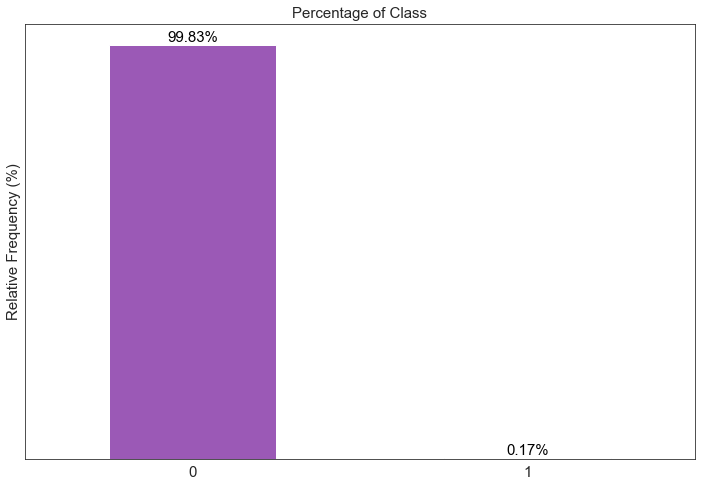

In [9]:
freq_table(data.Class)

Perfect example of a class imbalance.

In [10]:
get_nulls(data)

There are 0 columns with missing values.


,Null Data Count,Null Data Pct


In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Graphs

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


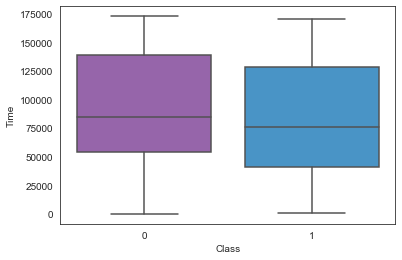

In [12]:
sns.boxplot(x='Class', y='Time',data=data)
data.groupby('Class').Time.describe()

Distribution looks pretty similar for both classes.

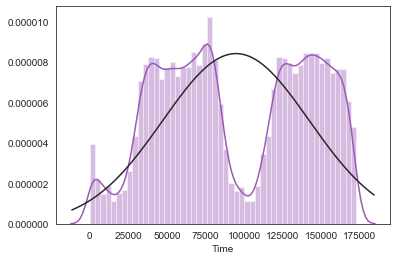

In [13]:
sns.distplot(data[data.Class==0].Time, fit=norm)

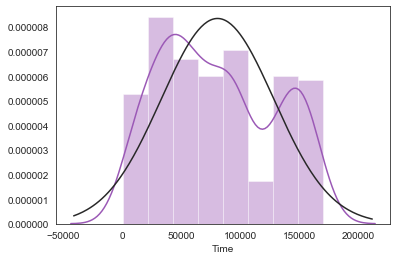

In [14]:
sns.distplot(data[data.Class==1].Time, fit=norm)

Time is one of the two only non-anonymized features in the dataset. The distribution is highly bimodel for non-frauds while the frauds is almost bimodel but there is a similar dip in the same range.

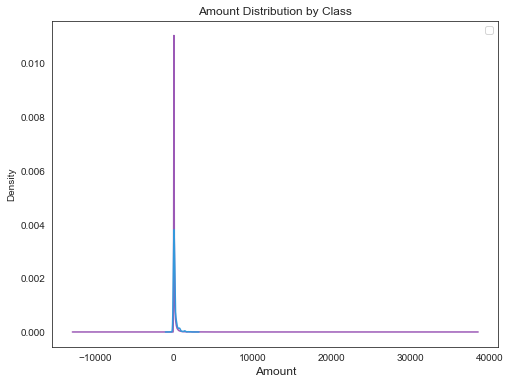

In [15]:
# Create figure space
plt.figure(figsize=(8, 6))

# Plot
data.Amount[data.Class==0].plot(kind='kde')
data.Amount[data.Class==1].plot(kind='kde')

# Set plot features
plt.xlabel('Amount', fontsize=12)
plt.title('Amount Distribution by Class', fontsize=12)
plt.legend('Non-Fraud', 'Fraud', loc='best')
plt.show()

A density plot isn't very informative with majority of the amounts within the 0 range.

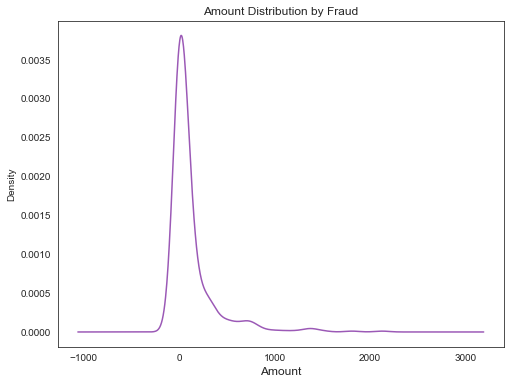

In [16]:
# Create figure space
plt.figure(figsize=(8, 6))

# Plot
data.Amount[data.Class==1].plot(kind='kde')

# Set plot features
plt.xlabel('Amount', fontsize=12)
plt.title('Amount Distribution by Fraud', fontsize=12)
plt.show()

If we look at only fraud transactions then majority falls within 0 to 1000. It makes sense that most frauds are lower amount so it has a smaller chance of being detected.

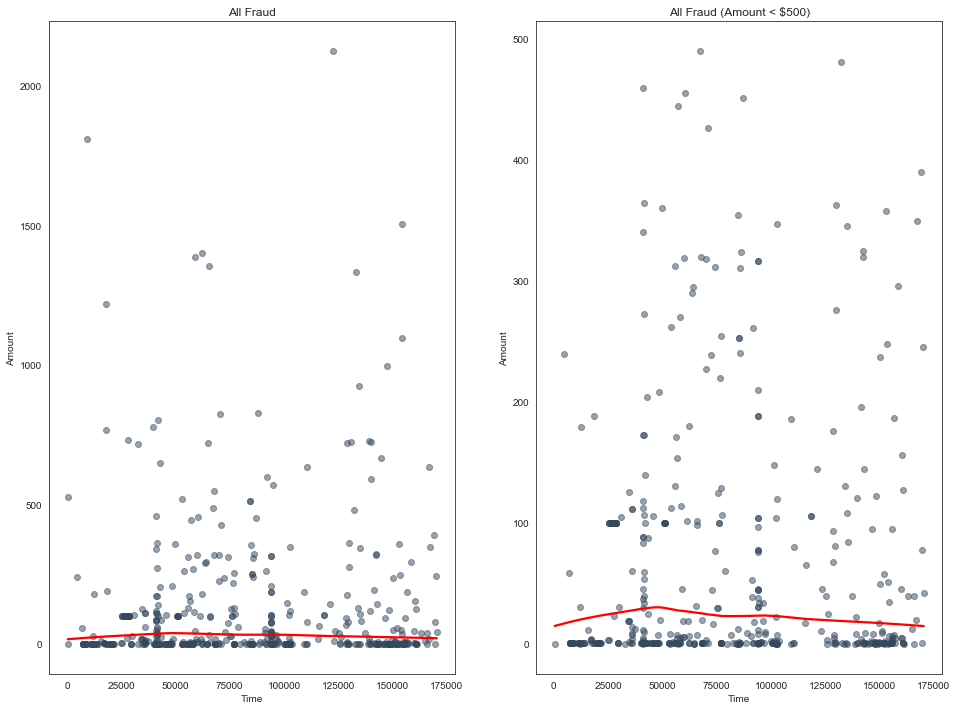

In [17]:
# Set figure space
# fig = plt.figure(figsize=(8,6 ))
fig, ax = plt.subplots(figsize=(16, 12), ncols=2)

# Create a scatterplot with a loess line
# import statsmodel
ax1 = sns.regplot(x='Time', y='Amount', data=data[data.Class==1], 
                  lowess=True,
                  color='#34495e',
                  scatter=True,
                  line_kws={'color': 'red'},
                  scatter_kws={'alpha': 0.50},
                  ax=ax[0])

ax2 = sns.regplot(x='Time', y='Amount', data=data[(data.Class==1) & (data.Amount<500)], 
                  lowess=True,
                  color='#34495e',
                  scatter=True,
                  line_kws={'color': 'red'},
                  scatter_kws={'alpha': 0.50},
                  ax=ax[1])

# Set plot features
ax1.set_title('All Fraud', fontsize=12)
ax2.set_title('All Fraud (Amount < $500)', fontsize=12)

plt.show()

In [18]:
print('Fraud Amount Range < $2500, Count: {}'.format(data[(data.Class==1) & (data.Amount<2500)].Class.sum()))
print('Fraud Amount Range < $1000, Count: {}'.format(data[(data.Class==1) & (data.Amount<1000)].Class.sum()))
print('Fraud Amount Range < $500, Count: {}'.format(data[(data.Class==1) & (data.Amount<500)].Class.sum()))
print('Fraud Amount Range < $250, Count: {}'.format(data[(data.Class==1) & (data.Amount<250)].Class.sum()))
print('Fraud Amount Range < $100, Count: {}'.format(data[(data.Class==1) & (data.Amount<100)].Class.sum()))
print('Fraud Amount Range < $50, Count: {}'.format(data[(data.Class==1) & (data.Amount<50)].Class.sum()))
print('Fraud Amount Range < $10, Count: {}'.format(data[(data.Class==1) & (data.Amount<10)].Class.sum()))

Fraud Amount Range < $2500, Count: 492
Fraud Amount Range < $1000, Count: 483
Fraud Amount Range < $500, Count: 457
Fraud Amount Range < $250, Count: 418
Fraud Amount Range < $100, Count: 362
Fraud Amount Range < $50, Count: 305
Fraud Amount Range < $10, Count: 249


Looks like just amount half of the fraud amounts are under $10. Keeping it low.

In [19]:
# Anonymized features
features = data.iloc[:,1:29].columns

<Figure size 432x288 with 0 Axes>

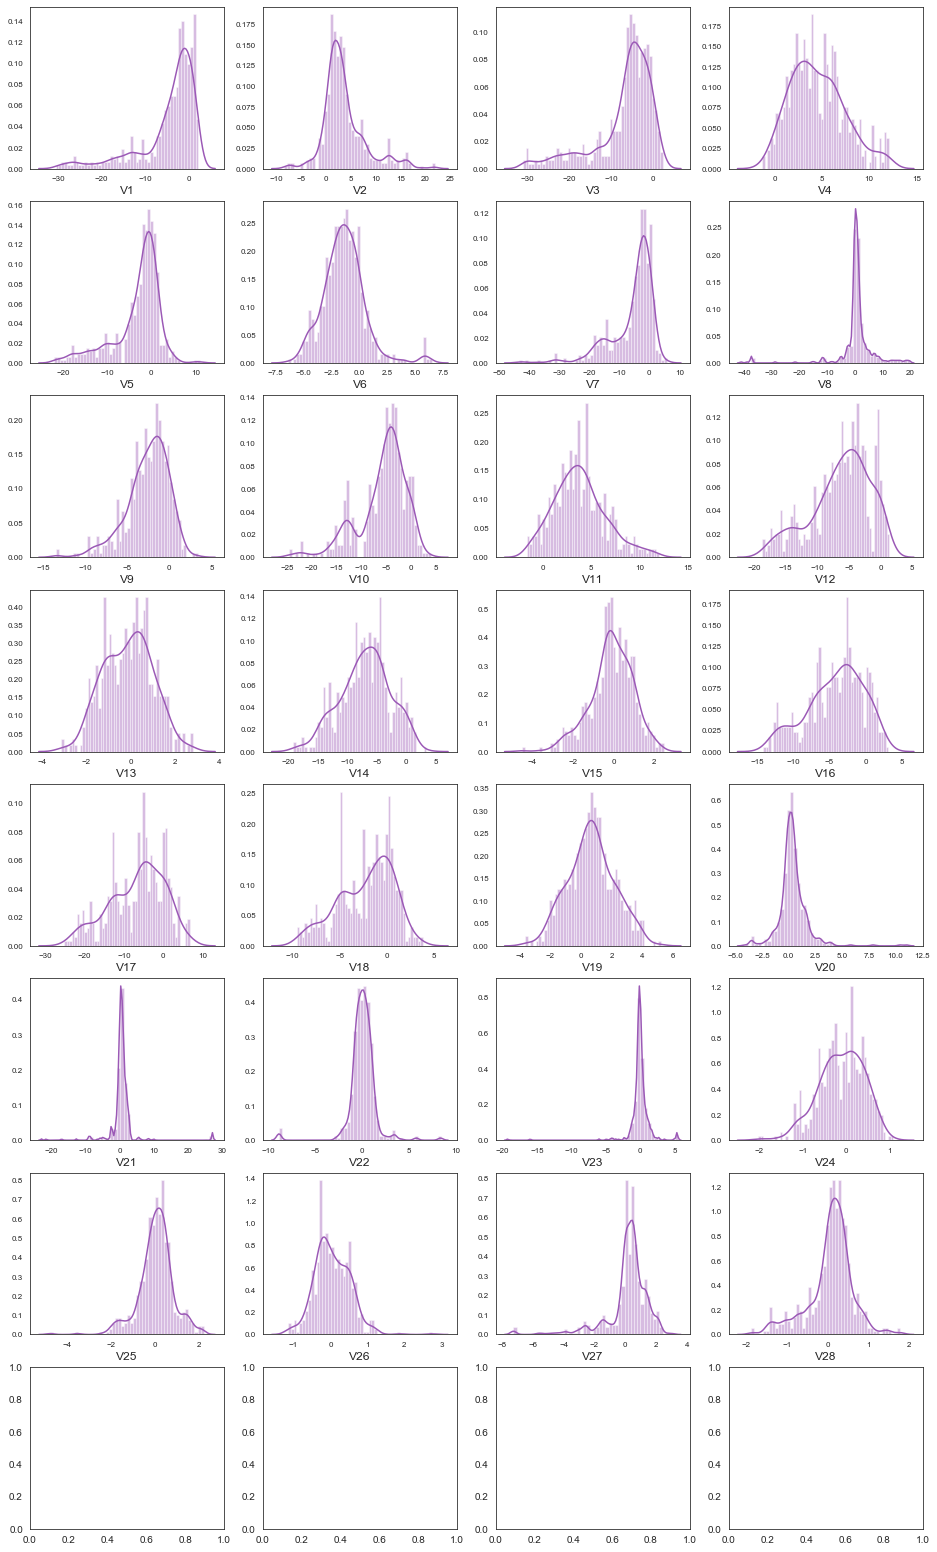

In [20]:
i = 0
frauds = data.loc[data['Class'] == 1]

# Set figure space
plt.figure()
fig, ax = plt.subplots(figsize=(16, 28), nrows=8, ncols=4)

# Plot
for feature in features:
    i+=1
    plt.subplot(8, 4, i)
    sns.distplot(frauds[feature], bins=50)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=8)
    
plt.show()

Plotting the distribution of fraudulent transactions.

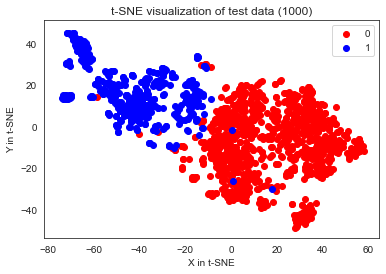

In [42]:
# Data
df2 = data[data.Class==1]
df2 = pd.concat([df2, data[data.Class==0].sample(n=1000)], axis=0) # 1000 is a small sample

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
new_y = df2.ix[:, -1].values

# TSNE
tsne = TSNE(n_components=2, random_state=100)
x_test_2d = tsne.fit_transform(df2_std)

# Scatterplot
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(new_y)):
    plt.scatter(x = x_test_2d[new_y==cl,0], 
                y = x_test_2d[new_y==cl,1], 
                c = color_map[idx], 
                label = cl)
    
# Set plot features
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='best')
plt.title('t-SNE visualization of test data (1000)')
plt.show()

In [21]:
# # Split the dataset into train and test

# # Define X / y
# y = data.Class
# X = data.drop('Class', axis=1)

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [22]:
# # Check fraudulent transactions
# print('Percentage of Fraud Transactions in train is: ', round(y_train.mean(), 4))
# print('Percentage of Fraud Transactions in test is: ', round(y_test.mean(), 4))

Cant split my dataset normally because I want to have more fraudulent transactions in my training set.

In [23]:
# Create dataframes of only Fraud and Normal transactions
fraud_transactions = data[data.Class==1]
normal_transactions = data[data.Class==0]

# Split the data so the training data will have 80% of the fraudulent transactions
X_train = fraud_transactions.sample(frac=0.80)
count_frauds = len(X_train)

# Get 80% of normal transactions
X_train = pd.concat([X_train, normal_transactions.sample(frac=0.80)], axis=0)

# Get the other 20% remaining
X_test = data.loc[~data.index.isin(X_train.index)]

In [24]:
# Shuffle randomly
X_train = shuffle(X_train, random_state=100)
X_test = shuffle(X_test, random_state=100)

In [25]:
# Get our target feature
y_train = X_train.Class
X_train = X_train.drop('Class', axis=1)

y_test = X_test.Class
X_test = X_test.drop('Class', axis=1)

In [26]:
# Check
print('X_train Length:', len(X_train))
print('y_train Length:', len(y_train))
print('X_test Length:', len(X_test))
print('y_test Length:', len(y_test))

X_train Length: 227846
y_train Length: 227846
X_test Length: 56961
y_test Length: 56961


In [27]:
# Get ratio of normal to fraud loans
ratio = len(X_train)/count_frauds 
print('Ratio: {}'.format(ratio))

Ratio: 578.2893401015228


In [28]:
# Part to get ratio of frauds equal
y_train *= ratio
y_test *= ratio

In [29]:
# Names of all of the features
features = X_train.columns.values

# Normalize the data, which will help the neural network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the neural network


In [30]:
# Split the data into validation and testing sets
half = int(len(y_test)/2)

X_input = X_train
Y_input = y_train.as_matrix()

X_input_valid = X_test[:half]
Y_input_valid = y_test.as_matrix()[:half]

X_input_test = X_test[half:]
Y_input_test = y_test.as_matrix()[half:]

In [31]:
# Define model parameters
learning_rate = 0.005
training_epochs = 5
display_step = 1
training_dropout = 0.90
n_samples = y_train.shape[0]
batch_size = 2048

# Define how many inputs and outputs are in our neural network
number_of_inputs = 30
number_of_outputs = 2

# Maintain fixed ratio of nodes between each layer
multiplier = 1.5

# Number of nodes in each layer
layer_1_nodes = 18
layer_2_nodes = round(layer_1_nodes*multiplier)
layer_3_nodes = round(layer_2_nodes*multiplier)

# Percent of nodes to keep during dropout
dropout_keep = tf.placeholder(tf.float32)

https://github.com/davidtnly/DeepLearning/blob/master/00-development/08-tensorflow-review-vs-keras.ipynb

In [32]:
# Define input layer
with tf.variable_scope('input', reuse=tf.AUTO_REUSE):
    X = tf.placeholder(tf.float32, shape=(None, number_of_inputs))
    
# Layer 1
with tf.variable_scope('layer_1', reuse=tf.AUTO_REUSE):
    weights = tf.get_variable('weights1', shape=[number_of_inputs, layer_1_nodes], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable('biases1', shape=[layer_1_nodes], initializer=tf.zeros_initializer)
    layer_1_output = tf.nn.sigmoid(tf.matmul(X, weights) + biases) # matrix multiplication and a standard rectified linear unit 

# Layer 2
with tf.variable_scope('layer_2', reuse=tf.AUTO_REUSE):
    weights = tf.get_variable('weights2', shape=[layer_1_nodes, layer_2_nodes], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable('biases2', shape=[layer_2_nodes], initializer=tf.zeros_initializer())
    layer_2_output = tf.nn.sigmoid(tf.matmul(layer_1_output, weights) + biases)
    
# Layer 3
with tf.variable_scope('layer_3', reuse=tf.AUTO_REUSE):
    weights = tf.get_variable('weights3', shape=[layer_2_nodes, layer_3_nodes], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable('biases3', shape=[layer_3_nodes], initializer=tf.zeros_initializer())
    layer_3_output = tf.nn.relu(tf.matmul(layer_2_output, weights) + biases)
    layer_3_output = tf.nn.dropout(layer_3_output, rate=dropout_keep) # keep_prob will be deprecated
    
# Layer 4 
with tf.variable_scope('layer_4', reuse=tf.AUTO_REUSE):
    weights = tf.get_variable('weights4', shape=[layer_3_nodes, number_of_outputs], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable('biases4', shape=[number_of_outputs], initializer=tf.zeros_initializer())
    layer_4_output = tf.nn.softmax(tf.matmul(layer_3_output, weights) + biases)

# # Output
# y = layer_4_output
# y_ = tf.placeholder(tf.float32, shape=(None, number_of_outputs))

# # Cost function
# cost = -tf.reduce_sum(y_*tf.log(y))

# # Optimizer
# optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Define the cost function
with tf.variable_scope('cost', reuse=tf.AUTO_REUSE):
    Y = tf.placeholder(tf.float32, shape=(batch_size, None))
    cost = -tf.reduce_sum(layer_4_output*tf.log(Y)) # ???
    
# Define the optimizer function (train & optimize)
with tf.variable_scope('train', reuse=tf.AUTO_REUSE):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


Issue with defining optimizer: https://github.com/tensorflow/tensorflow/issues/1511

In [33]:
tf.trainable_variables()

[<tf.Variable 'layer_1/weights1:0' shape=(30, 18) dtype=float32_ref>,
 <tf.Variable 'layer_1/biases1:0' shape=(18,) dtype=float32_ref>,
 <tf.Variable 'layer_2/weights2:0' shape=(18, 27) dtype=float32_ref>,
 <tf.Variable 'layer_2/biases2:0' shape=(27,) dtype=float32_ref>,
 <tf.Variable 'layer_3/weights3:0' shape=(27, 40) dtype=float32_ref>,
 <tf.Variable 'layer_3/biases3:0' shape=(40,) dtype=float32_ref>,
 <tf.Variable 'layer_4/weights4:0' shape=(40, 2) dtype=float32_ref>,
 <tf.Variable 'layer_4/biases4:0' shape=(2,) dtype=float32_ref>]

In [34]:
# # Cost function
# cost = -tf.reduce_sum(y_*tf.log(y))

# # Optimizer function
# optimizer_adam = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [35]:
# Correct prediction from softmax
correct_prediction = tf.equal(tf.argmax(layer_4_output, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [36]:
accuracy_summary = [] 
cost_summary = [] 
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 

In [37]:
# Save weights location
checkpoint = '../Checkpoints/'
saver = tf.train.Saver(max_to_keep=1)

In [38]:
# # Create a summary operation to log the progress of the network (variable to hold the logs)
# with tf.variable_scope('logging'):
    
#     # Add a scaler object to represent the value we are logging
#     tf.summary.scaler('current_cost', cost)
    
#     # Execute all summary nodes in the graph withou explicitly lsiting them all
#     summary = tf.summary.merge_all() # helper function

# # Create a saver object
# saver = tf.train.Saver(max_to_keep=1)

In [40]:
################################################
####### Initialize Session
################################################

with tf.Graph().as_default():
    
    # Initialize a training session after defining the model
    with tf.Session() as session:

        # Run the global variable initializer to initialize all variables/layers in the neural network
        session.run(tf.global_variables_initializer()) # executes commands by calling session.run()

        # Training
        for epoch in range(training_epochs):
            for batch in range(int(n_samples/batch_size)):
                batch_x = X_input[batch*batch_size: (1+batch)*batch_size]
                batch_y = Y_input[batch*batch_size: (1+batch)*batch_size]

                # Reshape
                batch_x = np.reshape(batch_x, (2048, -1))
                batch_y = np.reshape(batch_y, (2048, -1))

                # Run optimizer
                session.run('optimizer', feed_dict={X: batch_x, Y: batch_y})

            # Display logs after every epoch
            if (epoch) % display_step == 0:
                train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={X: X_input, Y: Y_input})
                valid_accuracy, newCost = sess.run([accuracy, cost], feed_dict={X: X_input_valid, Y: Y_input_valid})

                print('Epoch: ', epoch,
                      'Acc = {:.5f}'.format(train_accuracy), 
                      'Cost = {:.5f}'.format(newCost),
                      'Valid_Acc = {:.5f}'.format(valid_accuracy), 
                      'Valid_Cost = {:.5f}'.format(valid_newCost))

                # Saving weights
                if epoch > 0 and valid_accuracy > max(valid_accuracy_summary) and valid_accuracy > 0.999:
                    saver.save(session, checkpoint)

                # Record the results of the model
                accuracy_summary.append(train_accuracy)
                cost_summary.append(newCost)
                valid_accuracy_summary.append(valid_accuracy)
                valid_cost_summary.append(valid_newCost)

                # If the model does not improve after 15 logs, stop the training
                if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                    stop_early += 1
                    if stop_early == 15:
                        break
                else:
                    stop_early = 0

        print("Finished.")

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("input/Placeholder:0", shape=(?, 30), dtype=float32) is not an element of this graph.

In [ ]:
#with tf.Session() as sess:
    # Load the best weights and show its results
    #saver.restore(sess, checkpoint)
    #training_accuracy = sess.run(accuracy, feed_dict={x: inputX, y_: inputY, pkeep: training_dropout})
    #validation_accuracy = sess.run(accuracy, feed_dict={x: inputX_valid, y_: inputY_valid, pkeep: 1})
    
    #print("Results using the best Valid_Acc:")
    #print()
    #print("Training Accuracy =", training_accuracy)
    #print("Validation Accuracy =", validation_accuracy)

In [ ]:
# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary) # blue
ax1.plot(valid_accuracy_summary) # green
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.plot(valid_cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()

### Possible errors

ValueError: Cannot feed value of shape (2048,) for Tensor 'cost_2/Placeholder:0', which has shape '(2048, ?)'

https://stackoverflow.com/questions/40430186/tensorflow-valueerror-cannot-feed-value-of-shape-64-64-3-for-tensor-uplace

https://stackoverflow.com/questions/45966301/tensorflow-cannot-feed-value-of-shape-100-784-for-tensor-placeholder0

(Tensor Tensor("add_1:0", shape=(3,), dtype=int32) is not an element of this graph.)

https://stackoverflow.com/questions/35826648/about-tensorflow-graph-what-am-i-wrong-with-this-program

ValueError: Fetch argument 'optimizer' cannot be interpreted as a Tensor. ("The name 'optimizer' refers to an Operation not in the graph.")

https://stackoverflow.com/questions/57345098/tensorflow-cannot-interpret-feed-dict-key-as-tensor-tensor-tensor-is-not-an-el
